In [5]:
## This script reports statistics used in the paper

In [41]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy
import warnings

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

In [2]:
#Load ESCAPE training data
escapeAllData = pd.read_csv("Data/Original DataFrames/AllDataSingleValue.csv", sep=",", index_col='DEIDNUM').sort_index() #all feature dataset
escapeHemo = pd.read_csv("Data/Original DataFrames/HemoSingleValue.csv", sep=",", index_col='DEIDNUM').sort_index() #dataset with only hemodynamics
escapeLabels  = pd.read_csv("Data/Original DataFrames/Labels.csv", sep=",", index_col='DEIDNUM').sort_index() #labels for prediction classes 
escapeHemoLabels = escapeLabels[escapeLabels.index.isin(escapeHemo.index)]

#Cardiogenic Shock
cardShockHemo = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/HemoCardiogenicShock.csv", sep=",", index_col='ID').sort_index()
cardShockAllData = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/AllDataCardiogenicShock.csv", sep=",", index_col='ID').sort_index()
cardShockHemoLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/HemoLabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()
cardShockLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/LabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()

#Serial Cardiac
serialHemo = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/HemoSerialCardiac.csv", sep=",", index_col='ID').sort_index()
serialAllData = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/AllDataSerialCardiac.csv", sep=",", index_col='ID').sort_index()
serialHemoLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/HemoLabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()
serialLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/LabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()

#BEST
bestAllData = pd.read_csv("Data Validation/BEST/Original DataFrames/AllDataBEST.csv", sep=",", index_col='ID').sort_index()
bestLabels = pd.read_csv("Data Validation/BEST/Original DataFrames/LabelsBEST.csv", sep=",", index_col='ID').sort_index()

#Guide it
guideAllData = pd.read_csv("Data Validation/GUIDE-IT/Original DataFrames/AllDataGUIDE-IT.csv", sep=",", index_col='ID').sort_index()
guideLabels = pd.read_csv("Data Validation/GUIDE-IT/Original DataFrames/LabelsGUIDE-IT.csv", sep=",", index_col='ID').sort_index()


In [58]:
escapeHemo

,Age,Gender,Race,EjF,RAP,PAS,PAD,PAMN,PCWP,CO,...,PP,PPP,PAPP,SVR,RAT,PPRatio,PAPi,SAPi,CPP,PRAPRat
DEIDNUM,,,,,,,,,,,,,,,,,,,,,
72,88.0,2.0,1.0,25.0,24.0,42.0,24.0,30.0,36.0,2.20,...,28.0,0.245614,0.428571,5357.575758,0.666667,0.266667,0.750000,0.777778,50.0,1.166667
72,88.0,2.0,1.0,25.0,18.0,42.0,24.0,30.0,24.0,3.10,...,24.0,0.235294,0.428571,3509.677419,0.750000,0.272727,1.000000,1.000000,50.0,1.333333
81,69.0,1.0,1.0,20.0,10.0,40.0,20.0,27.0,18.0,4.52,...,17.0,0.212500,0.500000,1982.300885,0.555556,0.242857,2.000000,0.944444,45.0,1.700000
81,69.0,1.0,1.0,20.0,12.0,35.0,15.0,25.0,17.0,4.65,...,40.0,0.470588,0.571429,1772.043011,0.705882,0.571429,1.666667,2.352941,45.0,3.333333
814,58.0,1.0,1.0,NaN,3.0,51.0,19.0,30.0,18.0,4.10,...,34.0,0.354167,0.627451,2621.138211,0.166667,0.566667,10.666667,1.888889,44.0,11.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98508,57.0,1.0,98.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN
99302,41.0,1.0,2.0,15.0,19.0,87.0,37.0,54.0,44.0,3.90,...,54.0,0.486486,0.574713,2666.666667,0.431818,0.642857,2.631579,1.227273,13.0,2.842105
99302,41.0,1.0,2.0,15.0,11.0,70.0,28.0,44.0,28.0,5.30,...,86.0,0.623188,0.600000,2440.251572,0.392857,1.088608,3.818182,3.071429,13.0,7.818182


# Get Patient Cohort Baseline Characteristics

In [33]:

def getStats(data, labels):
    lst = []
    
    lst.append(len(labels))

    if len(data) == len(labels) * 2:
        lst.append(str(round(data.describe()['Age'][1],1)) + "±" + str(round(data.describe()['Age'][2],1)))
        gen = data['Gender'].value_counts()/2/len(labels)
        lst.append(round(gen[2.0]*100,1))
        gen = data['Race'].value_counts()/2/len(labels)
        lst.append(str(round(gen[1.0]*100,1))+"[" + str(round(gen[2.0]*100,1))+"]")
        lst.append(str(round(data.describe()['BMI'][1],1)) + "±" + str(round(data.describe()['BMI'][2],1)))
        lst.append(str(round(data.describe()['EjF'][1],1)) + "±" + str(round(data.describe()['EjF'][2],1)))
        lst.append(str(round(data.describe()['HR'][1],1)) + "±" + str(round(data.describe()['HR'][2],1)))
        lst.append(str(round(data.describe()['BPSYS'][1],1)) + "±" + str(round(data.describe()['BPSYS'][2],1)))
        lst.append(str(round(data.describe()['BPDIAS'][1],1)) + "±" + str(round(data.describe()['BPDIAS'][2],1)))
        
        lst.append(str(round(data.describe()['CRT'][1],1)) + "±" + str(round(data.describe()['CRT'][2],1)))
        lst.append(str(round(data.describe()['POT'][1],1)) + "±" + str(round(data.describe()['POT'][2],1)))
        lst.append(str(round(data.describe()['BUN'][1],1)) + "±" + str(round(data.describe()['BUN'][2],1)))
        lst.append(str(round(data.describe()['SOD'][1],1)) + "±" + str(round(data.describe()['SOD'][2],1)))

        
    else:
        lst.append(str(round(data.describe()['Age'][1],1)) + "±" + str(round(data.describe()['Age'][2],1)))
        gen = data['Gender'].value_counts()/len(labels)
        lst.append(round(gen[2.0]*100,1))
        gen = data['Race'].value_counts()/len(labels)
        lst.append(str(round(gen[1.0]*100,1))+"[" + str(round(gen[2.0]*100,1))+"]")
        lst.append(str(round(data.describe()['BMI'][1],1)) + "±" + str(round(data.describe()['BMI'][2],1)))
        lst.append(str(round(data.describe()['EjF'][1],1)) + "±" + str(round(data.describe()['EjF'][2],1)))
        lst.append(str(round(data.describe()['HR'][1],1)) + "±" + str(round(data.describe()['HR'][2],1)))
        lst.append(str(round(data.describe()['BPSYS'][1],1)) + "±" + str(round(data.describe()['BPSYS'][2],1)))
        lst.append(str(round(data.describe()['BPDIAS'][1],1)) + "±" + str(round(data.describe()['BPDIAS'][2],1)))
        
        lst.append(str(round(data.describe()['CRT'][1],1)) + "±" + str(round(data.describe()['CRT'][2],1)))
        lst.append(str(round(data.describe()['POT'][1],1)) + "±" + str(round(data.describe()['POT'][2],1)))
        lst.append(str(round(data.describe()['BUN'][1],1)) + "±" + str(round(data.describe()['BUN'][2],1)))
        lst.append(str(round(data.describe()['SOD'][1],1)) + "±" + str(round(data.describe()['SOD'][2],1)))

    lst.append(round(sum(labels['Death']) / len(labels),3))
    try:
        lst.append(round(sum(labels['Rehosp']) / len(labels),3))
    except:
        lst.append("N/A")
    try:
        lst.append(round(sum(labels['Readmission']) / len(labels),3))
    except:
        lst.append("N/A")
        
        
    return lst

def getStatsCath(data, labels):
    lst = []
    lst.append(len(labels))
    lst.append(str(round(data.describe()['Age'][1],1)) + "±" + str(round(data.describe()['Age'][2],1)))
    gen = data['Gender'].value_counts()/3/len(labels)
    lst.append(round(gen[2.0]*100,1))
    lst.append("N/A") #Race
    lst.append(str(round(data.describe()['BMI'][1],1)) + "±" + str(round(data.describe()['BMI'][2],1)))
    lst.append(str(round(data.describe()['EjF'][1],1)) + "±" + str(round(data.describe()['EjF'][2],1)))
    lst.append(str(round(data.describe()['HR'][1],1)) + "±" + str(round(data.describe()['HR'][2],1)))
    lst.append(str(round(data.describe()['BPSYS'][1],1)) + "±" + str(round(data.describe()['BPSYS'][2],1)))
    lst.append(str(round(data.describe()['BPDIAS'][1],1)) + "±" + str(round(data.describe()['BPDIAS'][2],1)))
    
    lst.append(str(round(data.describe()['CRT'][1],1)) + "±" + str(round(data.describe()['CRT'][2],1)))
    lst.append(str(round(data.describe()['POT'][1],1)) + "±" + str(round(data.describe()['POT'][2],1)))
    lst.append(str(round(data.describe()['BUN'][1],1)) + "±" + str(round(data.describe()['BUN'][2],1)))
    lst.append(str(round(data.describe()['SOD'][1],1)) + "±" + str(round(data.describe()['SOD'][2],1)))


    lst.append(round(sum(labels['Death']) / len(labels),3))
    lst.append(round(sum(labels['Rehosp']) / len(labels),3))
    lst.append("N/A")
        
    return lst
    

df = pd.DataFrame(index=["n", "Age (years)", "Gender (%, female)", "Race (%, white[minority])", "BMI", "EF", "HR", "BPSYS", "BPDIAS", "CRT", "POT", "BUN", "SOD", "Death", "Rehosp", "Readm"])
df['ESCAPE'] = getStats(escapeAllData, escapeLabels)
df['BEST'] = getStats(bestAllData, bestLabels)
df['GUIDE-IT'] = getStats(guideAllData, guideLabels)
df['UVA Cardiogenic Shock'] = getStatsCath(cardShockAllData, cardShockLabels)
df['UVA Serial Cath'] = getStatsCath(serialAllData, serialLabels)


# df = pd.DataFrame(bigLst, columns=['idx','ESCAPE', 'HF-ACTION']).set_index("idx")
df

,ESCAPE,BEST,GUIDE-IT,UVA Cardiogenic Shock,UVA Serial Cath
n,433,2707,388,364,183
Age (years),56.1±13.9,60.2±12.3,62.2±13.9,59.4±18.5,60.6±15.1
"Gender (%, female)",25.9,21.9,66.2,35.2,43.2
"Race (%, white[minority])",59.6[40.4],70.0[30.0],49.2[50.8],N/A,N/A
BMI,28.4±6.7,0.0±0.0,15.4±16.7,29.8±8.8,47.3±286.9
EF,19.3±6.6,23.0±7.3,24.0±8.2,31.7±17.4,31.3±18.0
HR,80.8±14.9,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0
BPSYS,103.7±15.8,118.5±19.4,115.4±20.0,111.1±21.9,109.1±21.4
BPDIAS,64.1±11.5,71.9±11.7,70.2±13.5,62.2±15.5,59.9±17.2
CRT,6.7±34.0,1.2±0.4,1.6±0.7,1.7±1.3,1.7±1.0


## Get Percent Data missing

In [13]:
def getMissing(misData):
    return sum(misData.isnull().sum()) / (misData.shape[0] * misData.shape[1]) * 100

In [16]:
# All Data
print("ESCAPE:", round(getMissing(escapeAllData),1))
print("BEST:", round(getMissing(bestAllData),1))
print("GUIDE IT:", round(getMissing(guideAllData),1))
print("Card Shock:", round(getMissing(cardShockAllData),1))
print("Serial:", round(getMissing(serialAllData),1))


ESCAPE: 7.8
BEST: 2.0
GUIDE IT: 15.1
Card Shock: 10.4
Serial: 7.3


In [17]:
# Hemo
print("ESCAPE:", round(getMissing(escapeHemo),1))
print("Card Shock:", round(getMissing(cardShockHemo),1))
print("Serial:", round(getMissing(serialHemo),1))

ESCAPE: 12.0
Card Shock: 5.9
Serial: 9.2


# Get confidence intervals for training data

In [50]:
# Helper functions
# Return 95% Confidence Interval for Value
def CI(val, n):
    ci = 1.96 * math.sqrt(abs(val - (1 - val)) / n)
    #return ci
    return str(val) + " +/- " + str(round(ci,3))

In [67]:
# Hemo - DeLvTx
print("Accuracy", CI(0.957, len(escapeHemo)))
print("AUC", CI(0.952, len(escapeHemo)))
print("Sens", CI(0.936, len(escapeHemo)))
print("Spec", CI(0.968, len(escapeHemo)))

Accuracy 0.957 +/- 0.092
AUC 0.952 +/- 0.091
Sens 0.936 +/- 0.09
Spec 0.968 +/- 0.093


In [68]:
# Hemo - Rehosp
print("Accuracy", CI(0.961, len(escapeHemo)))
print("AUC", CI(0.956, len(escapeHemo)))
print("Sens", CI(0.942, len(escapeHemo)))
print("Spec", CI(0.970, len(escapeHemo)))

Accuracy 0.961 +/- 0.092
AUC 0.956 +/- 0.092
Sens 0.942 +/- 0.09
Spec 0.97 +/- 0.093


In [66]:
# All Features - DeLvTx
print("Accuracy", CI(0.994, len(escapeAllData)))
print("AUC", CI(0.978, len(escapeAllData)))
print("Sens", CI(0.963, len(escapeAllData)))
print("Spec", CI(0.994, len(escapeAllData)))

Accuracy 0.994 +/- 0.066
AUC 0.978 +/- 0.065
Sens 0.963 +/- 0.064
Spec 0.994 +/- 0.066


In [65]:
# All Features - Rehosp
print("Accuracy", CI(0.994, len(escapeAllData)))
print("AUC", CI(0.975, len(escapeAllData)))
print("Sens", CI(0.958, len(escapeAllData)))
print("Spec", CI(0.994, len(escapeAllData)))

Accuracy 0.994 +/- 0.066
AUC 0.975 +/- 0.065
Sens 0.958 +/- 0.064
Spec 0.994 +/- 0.066


# Plot Training Averaged AUC Graphs

In [ ]:
from sklearn.metrics import auc

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr = 0.027
tpr = 0.946
roc = auc(fpr, tpr)

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot and save averaged AUC graph
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 18})
plt.plot(fpr, tpr,
     label='Averaged AUC: {0:0.3f}'
           ''.format(roc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import auc

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr = 0.027
tpr = 0.946
roc = auc(fpr, tpr)

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot and save averaged AUC graph
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 18})
plt.plot(fpr, tpr,
     label='Averaged AUC: {0:0.3f}'
           ''.format(roc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.legend(loc="lower right")

# Get Outcome Percentages Based on Cluster Group

In [ ]:
#Load ESCAPE training data
escapeAllData = pd.read_csv("Data/Preprocessed Data/ESCAPE_AllData.csv", sep=",", index_col='ID').sort_index() #all feature dataset
escapeHemo = pd.read_csv("Data/Preprocessed Data/ESCAPE_Hemo.csv", sep=",", index_col='ID').sort_index() #dataset with only hemodynamics
escapeLabels  = pd.read_csv("Data/Original DataFrames/Labels.csv", sep=",", index_col='DEIDNUM').sort_index() #labels for prediction classes 
escapeHemoLabels = escapeLabels[escapeLabels.index.isin(escapeHemo.index)]

#Cardiogenic Shock
cardShockHemo = pd.read_csv("Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_Hemo.csv", sep=",", index_col='ID').sort_index()
cardShockAllData = pd.read_csv("Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_AllData.csv", sep=",", index_col='ID').sort_index()
cardShockHemoLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/HemoLabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()
cardShockLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/LabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()

#Serial Cardiac
serialHemo = pd.read_csv("Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_Hemo.csv", sep=",", index_col='ID').sort_index()
serialAllData = pd.read_csv("Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_AllData.csv", sep=",", index_col='ID').sort_index()
serialHemoLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/HemoLabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()
serialLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/LabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()

#HF-ACTION
hfactionAllData = pd.read_csv("Data Validation/HF-ACTION/Preprocessed Data/HF-ACTION_AllData.csv", sep=",", index_col='ID').sort_index()
hfactionLabels = pd.read_csv("Data Validation/HF-ACTION/Original DataFrames/LabelsHF-ACTION.csv", sep=",", index_col='ID').sort_index()

#BEST
bestAllData = pd.read_csv("Data Validation/BEST/Preprocessed Data/BEST_AllData.csv", sep=",", index_col='ID').sort_index()
bestLabels = pd.read_csv("Data Validation/BEST/Original DataFrames/LabelsBEST.csv", sep=",", index_col='ID').sort_index()

#Guide it
guideAllData = pd.read_csv("Data Validation/GUIDE-IT/Preprocessed Data/GUIDE-IT_AllData.csv", sep=",", index_col='ID').sort_index()
guideLabels = pd.read_csv("Data Validation/GUIDE-IT/Original DataFrames/LabelsGUIDE-IT.csv", sep=",", index_col='ID').sort_index()


In [ ]:
def getPercentOutcome(dataset, labels, outcome, risk):
    cluster = dataset.loc[dataset['Score' + outcome] == risk ]
    labelMatches = labels[labels.index.isin(cluster.index)]
    per = labelMatches[outcome].mean()
    return per


In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Death'
for r in risks:
    per1 = getPercentOutcome(escapeHemo, escapeHemoLabels, outcome, r)
    per2 = getPercentOutcome(cardShockHemo, cardShockHemoLabels, outcome, r)
    per3 = getPercentOutcome(serialHemo, serialHemoLabels, outcome, r)
    lst.append([r, per1, per2, per3])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial']).set_index('Cluster')
print(df.mean(axis=1))
df.T


In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Rehosp'
for r in risks:
    per1 = getPercentOutcome(escapeHemo, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockHemo, cardShockHemoLabels, outcome, r)
#     per3 = getPercentOutcome(serialHemo, serialHemoLabels, outcome, r)
    lst.append([r, per1, per2, per3])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial']).set_index('Cluster')
print(df.mean(axis=1))
df.T

## All Data

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Death'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
    per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
    per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
    per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
    per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1, per2, per3, per4, per5, per6])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial', 'HF-ACTION', 'BEST', 'GUIDE']).set_index('Cluster')
print(df.mean(axis=1))
df.T

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Rehosp'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
#     per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
    per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
    per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1,  per4, per5, per6])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE',  'HF-ACTION', 'BEST', 'GUIDE']).set_index('Cluster')
print(df.mean(axis=1))
df.T

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Readmission'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
#     per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
#     per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
#     per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1,  per4, ])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE',  'HF-ACTION']).set_index('Cluster')
print(df.mean(axis=1))
df.T

# Get Outcome Percentages Based on Cluster Group

In [ ]:
#Load ESCAPE training data
escapeAllData = pd.read_csv("Data/Preprocessed Data/ESCAPE_AllData.csv", sep=",", index_col='ID').sort_index() #all feature dataset
escapeHemo = pd.read_csv("Data/Preprocessed Data/ESCAPE_Hemo.csv", sep=",", index_col='ID').sort_index() #dataset with only hemodynamics
escapeLabels  = pd.read_csv("Data/Original DataFrames/Labels.csv", sep=",", index_col='DEIDNUM').sort_index() #labels for prediction classes 
escapeHemoLabels = escapeLabels[escapeLabels.index.isin(escapeHemo.index)]

#Cardiogenic Shock
cardShockHemo = pd.read_csv("Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_Hemo.csv", sep=",", index_col='ID').sort_index()
cardShockAllData = pd.read_csv("Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_AllData.csv", sep=",", index_col='ID').sort_index()
cardShockHemoLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/HemoLabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()
cardShockLabels = pd.read_csv("Data Validation/Cardiogenic Shock/Original DataFrames/LabelsCardiogenicShock.csv", sep=",", index_col='ID').sort_index()

#Serial Cardiac
serialHemo = pd.read_csv("Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_Hemo.csv", sep=",", index_col='ID').sort_index()
serialAllData = pd.read_csv("Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_AllData.csv", sep=",", index_col='ID').sort_index()
serialHemoLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/HemoLabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()
serialLabels = pd.read_csv("Data Validation/Serial Cardiac Caths/Original DataFrames/LabelsSerialCardiac.csv", sep=",", index_col='ID').sort_index()

#HF-ACTION
hfactionAllData = pd.read_csv("Data Validation/HF-ACTION/Preprocessed Data/HF-ACTION_AllData.csv", sep=",", index_col='ID').sort_index()
hfactionLabels = pd.read_csv("Data Validation/HF-ACTION/Original DataFrames/LabelsHF-ACTION.csv", sep=",", index_col='ID').sort_index()

#BEST
bestAllData = pd.read_csv("Data Validation/BEST/Preprocessed Data/BEST_AllData.csv", sep=",", index_col='ID').sort_index()
bestLabels = pd.read_csv("Data Validation/BEST/Original DataFrames/LabelsBEST.csv", sep=",", index_col='ID').sort_index()

#Guide it
guideAllData = pd.read_csv("Data Validation/GUIDE-IT/Preprocessed Data/GUIDE-IT_AllData.csv", sep=",", index_col='ID').sort_index()
guideLabels = pd.read_csv("Data Validation/GUIDE-IT/Original DataFrames/LabelsGUIDE-IT.csv", sep=",", index_col='ID').sort_index()


In [ ]:
def getPercentOutcome(dataset, labels, outcome, risk):
    cluster = dataset.loc[dataset['Score' + outcome] == risk ]
    labelMatches = labels[labels.index.isin(cluster.index)]
    per = labelMatches[outcome].mean()
    return per


In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Death'
for r in risks:
    per1 = getPercentOutcome(escapeHemo, escapeHemoLabels, outcome, r)
    per2 = getPercentOutcome(cardShockHemo, cardShockHemoLabels, outcome, r)
    per3 = getPercentOutcome(serialHemo, serialHemoLabels, outcome, r)
    lst.append([r, per1, per2, per3])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial']).set_index('Cluster')
print(df.mean(axis=1))
df.T


In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Rehosp'
for r in risks:
    per1 = getPercentOutcome(escapeHemo, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockHemo, cardShockHemoLabels, outcome, r)
#     per3 = getPercentOutcome(serialHemo, serialHemoLabels, outcome, r)
    lst.append([r, per1, per2, per3])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial']).set_index('Cluster')
print(df.mean(axis=1))
df.T

## All Data

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Death'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
    per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
    per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
    per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
    per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1, per2, per3, per4, per5, per6])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE', 'Card Shock', 'Serial', 'HF-ACTION', 'BEST', 'GUIDE']).set_index('Cluster')
print(df.mean(axis=1))
df.T

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Rehosp'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
#     per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
    per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
    per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1,  per4, per5, per6])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE',  'HF-ACTION', 'BEST', 'GUIDE']).set_index('Cluster')
print(df.mean(axis=1))
df.T

In [ ]:
risks = [5, 4, 3, 2, 1]
lst = []
outcome = 'Readmission'
for r in risks:
    per1 = getPercentOutcome(escapeAllData, escapeLabels, outcome, r)
#     per2 = getPercentOutcome(cardShockAllData, cardShockLabels, outcome, r)
#     per3 = getPercentOutcome(serialAllData, serialLabels, outcome, r)
    per4 = getPercentOutcome(hfactionAllData, hfactionLabels, outcome, r)
#     per5 = getPercentOutcome(bestAllData, bestLabels, outcome, r)
#     per6 = getPercentOutcome(guideAllData, guideLabels, outcome, r)
    lst.append([r, per1,  per4, ])
    
df = pd.DataFrame(lst, columns = ['Cluster', 'ESCAPE',  'HF-ACTION']).set_index('Cluster')
print(df.mean(axis=1))
df.T

In [62]:
test = pd.read_csv("Data/Preprocessed Data/ESCAPE_AllData.csv", sep=",", index_col='ID').sort_index() #all feature dataset
test

,Age,Gender,Race,Wt,BMI,InitialHospDays,TotalHospDays,NYHA,MLHFS,AF,...,HR,PV,MAP,PP,PPP,PPRatio,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
ID,,,,,,,,,,,,,,,,,,,,,
72.0,88.0,2.0,1.0,57.100000,26.424175,9.0,16.0,4.0,76.0,1.0,...,104.0,12.452563,139.333333,26.0,0.276596,0.250000,3,1,2,5
72.0,88.0,2.0,1.0,52.000000,24.064047,9.0,16.0,3.0,76.0,1.0,...,92.0,12.452563,126.000000,26.0,0.302326,0.282609,3,1,2,5
72.0,37.0,2.0,2.0,64.863709,0.000000,0.0,0.0,3.0,0.0,1.0,...,0.0,0.000000,118.000000,28.0,0.341463,0.411765,1,2,3,2
81.0,69.0,1.0,1.0,102.363636,32.307675,5.0,13.0,4.0,21.0,1.0,...,70.0,-3.346568,125.333333,32.0,0.363636,0.457143,3,1,2,5
81.0,69.0,1.0,1.0,100.454545,31.705134,5.0,13.0,2.0,21.0,1.0,...,72.0,-3.346568,105.666667,34.0,0.441558,0.472222,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302.0,41.0,1.0,2.0,97.400000,40.541103,21.0,21.0,NaN,79.0,0.0,...,75.0,25.535155,130.000000,55.0,0.550000,0.733333,3,1,2,5
99912.0,46.0,1.0,1.0,78.636364,25.677180,2.0,2.0,4.0,89.0,0.0,...,67.0,-13.911732,174.666667,38.0,0.316667,0.567164,3,1,2,5
99912.0,46.0,1.0,1.0,78.200000,25.534694,2.0,2.0,3.0,89.0,0.0,...,60.0,-13.911732,140.666667,24.0,0.255319,0.400000,3,1,2,5


(array([858.,   0.,  12.,   0.,   0.,   8.,   0.,   8.,   0.,   1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

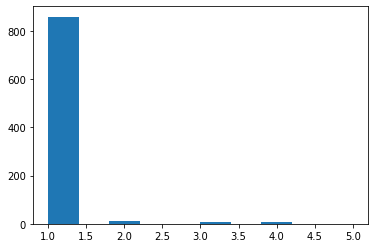

In [63]:
plt.hist(test['ScoreDeath'])